<a href="https://colab.research.google.com/github/jilakarramahalakshmi/FMML-ASSIGNMENT-LABS-/blob/main/Module_01_Lab_02_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [22]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-22-60ae2e9a125e>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [23]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [24]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [25]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [26]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [27]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [28]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [29]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [30]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [31]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [32]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

# question 1

Answer:The accuracy of the validation set can be affected when you change the percentage of data allocated to the text.During the training of a machine learning model. Here's how it typically behaves:

Increase Percentage of Validation Set:

Higher Confidence: With a larger validation set, you have a higher confidence in the model's performance because it's evaluated on a larger and more representative portion of the data.

Slower Training: However, increasing the validation set size may result in slower training since more data is reserved for validation, leaving less for training the model itself.
Risk of Overfitting: If the training set becomes too small due to a large validation set, it might lead to overfitting, where the model fits the training data too closely but doesn't generalize well to new, unseen data.
*Faster Training: A smaller validation set speeds up the training process because more data is available for training the model.

Risk of Overfitting: There's a higher risk of overfitting because the model might not be adequately evaluated on a representative portion of the data, potentially leading to an overly optimistic view of its performance.

#quetion 2

Ans: A larger validation set provides a more reliable estimate of your model's performance because it is evaluated on a larger, more representative portion of your data. However, if the training set becomes too small due to a large validation set, it could lead to overfitting, where the model fits the training data too closely but doesn't generalize well to new, unseen data.

#quetion 3

Ans: The percentage to reserve for the validation set, while balancing the need for model training and reliable performance estimation, depends on several factors, including the size of your dataset and the complexity of your model. However, a common practice is to allocate around 20-30% of your dataset to the validation set.


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [34]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [35]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3358163433120386
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


In [36]:
split_accuracies = []
av_accuracies = []

def MyAverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0

  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    split_accuracy = Accuracy(vallabel, valpred)
    split_accuracies.append(split_accuracy)
    print(f"Split number {ii} has validation accuracy = {split_accuracy}")
    accuracy += split_accuracy
  return accuracy/iterations # average of all accuracies

for i in range(5):
  avg_accuracy = MyAverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN)
  av_accuracies.append(avg_accuracy)
  print('Average validation accuracy is ', avg_accuracy)
  print("----------------------------------------")

testpred = NN(alltraindata, alltrainlabel, testdata)
print('Test accuracy is ', Accuracy(testlabel, testpred))

Split number 0 has validation accuracy = 0.33527696793002915
Split number 1 has validation accuracy = 0.34932349323493234
Split number 2 has validation accuracy = 0.3398034986820034
Split number 3 has validation accuracy = 0.3345651638334565
Split number 4 has validation accuracy = 0.3396547532214928
Split number 5 has validation accuracy = 0.33268905532737375
Split number 6 has validation accuracy = 0.33225886436895613
Split number 7 has validation accuracy = 0.3379006606312699
Split number 8 has validation accuracy = 0.342061013692049
Split number 9 has validation accuracy = 0.3361158850969801
Average validation accuracy is  0.33796493560185425
----------------------------------------
Split number 0 has validation accuracy = 0.34951456310679613
Split number 1 has validation accuracy = 0.35184732077318326
Split number 2 has validation accuracy = 0.3425588735129886
Split number 3 has validation accuracy = 0.3551425030978934
Split number 4 has validation accuracy = 0.33552151714077316
S

# question 1

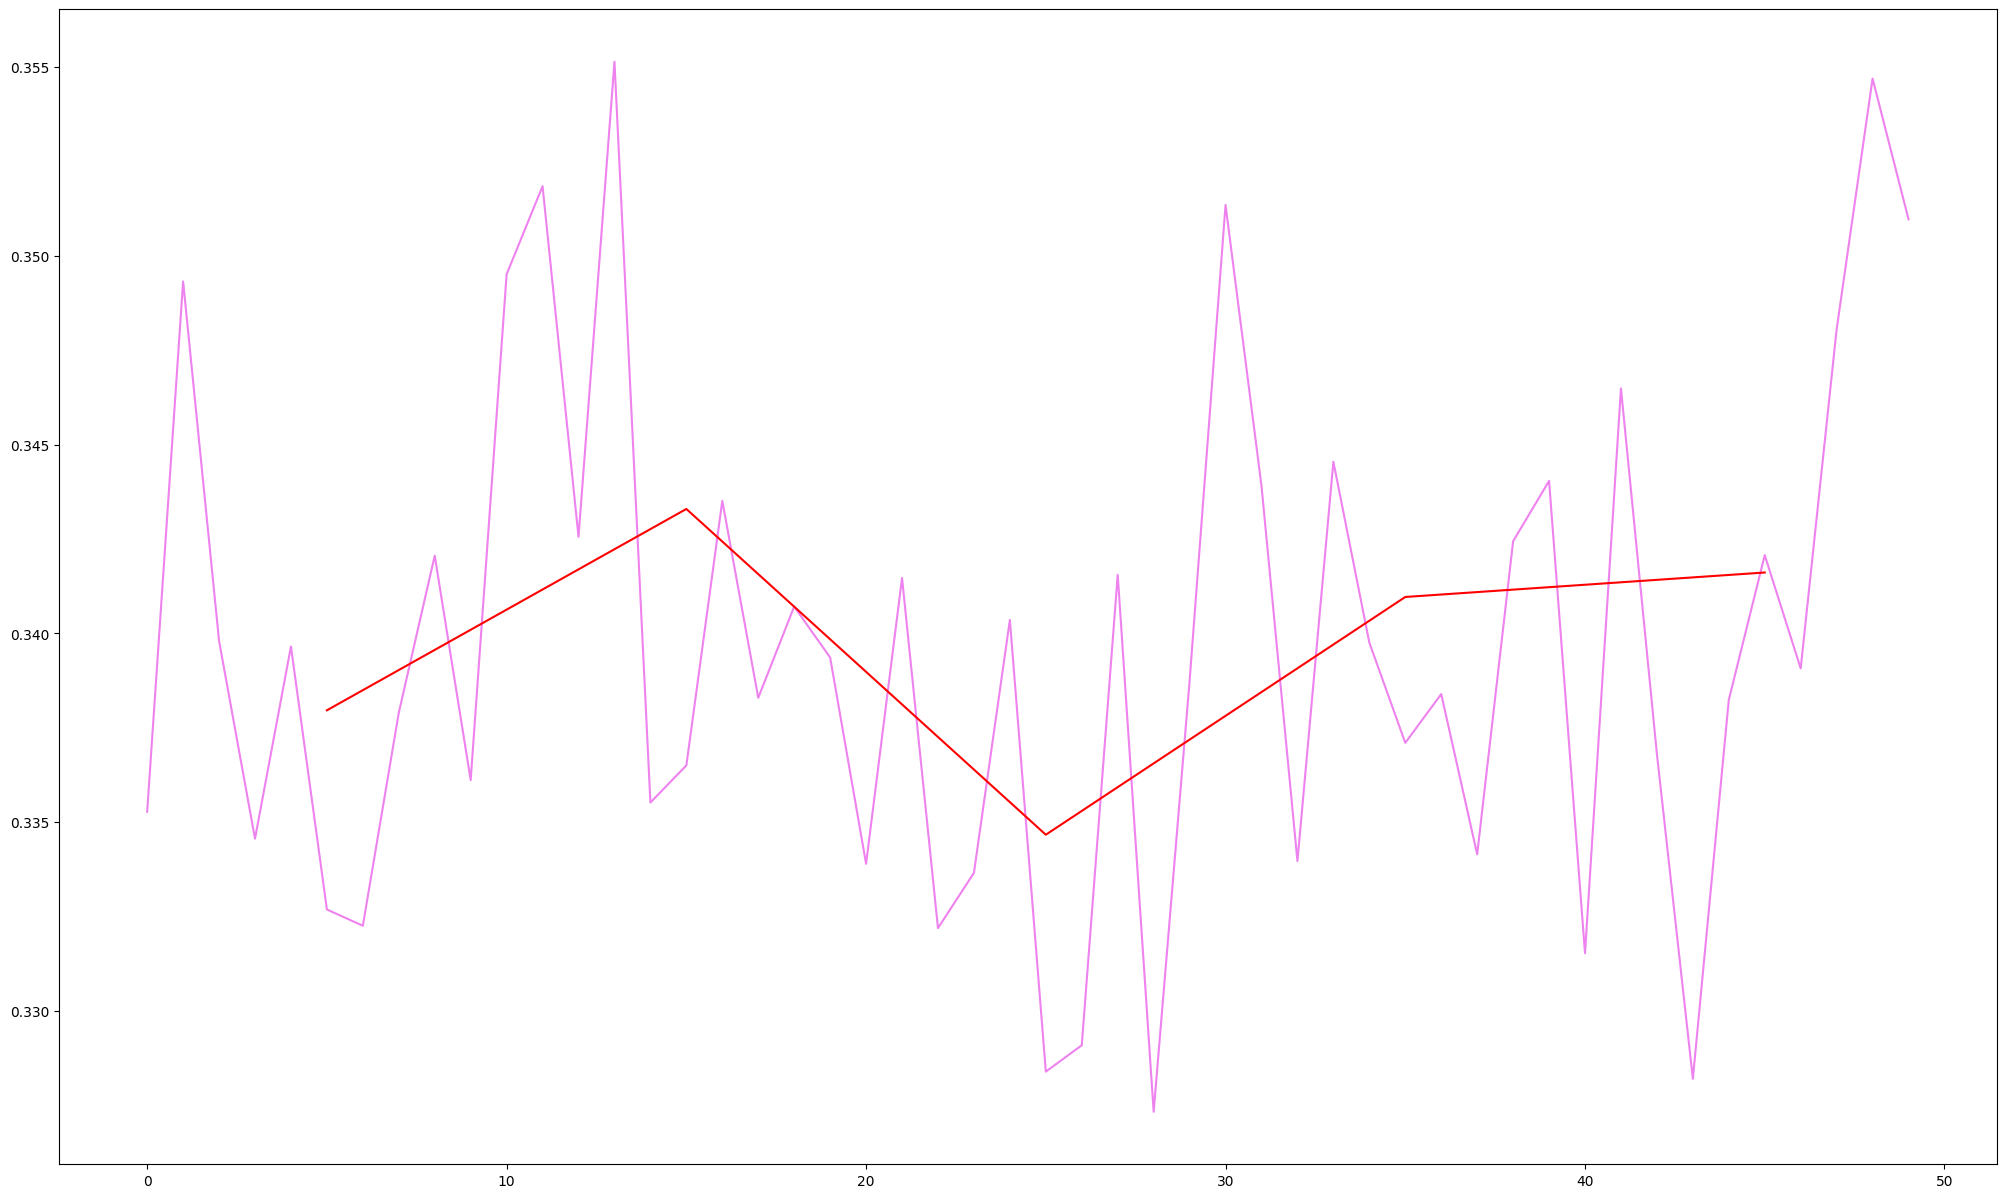

In [37]:
plt.figure(figsize = (25,15))
plt.plot(split_accuracies, label = 'Split Accuracy', color = 'violet')
plt.plot([5, 15, 25, 35, 45], av_accuracies, label = 'Average Validation Accuracy', color = 'red')
plt.show()

Yes averaging the validation accuracy across multiple splits give more consistent results

**question 2**

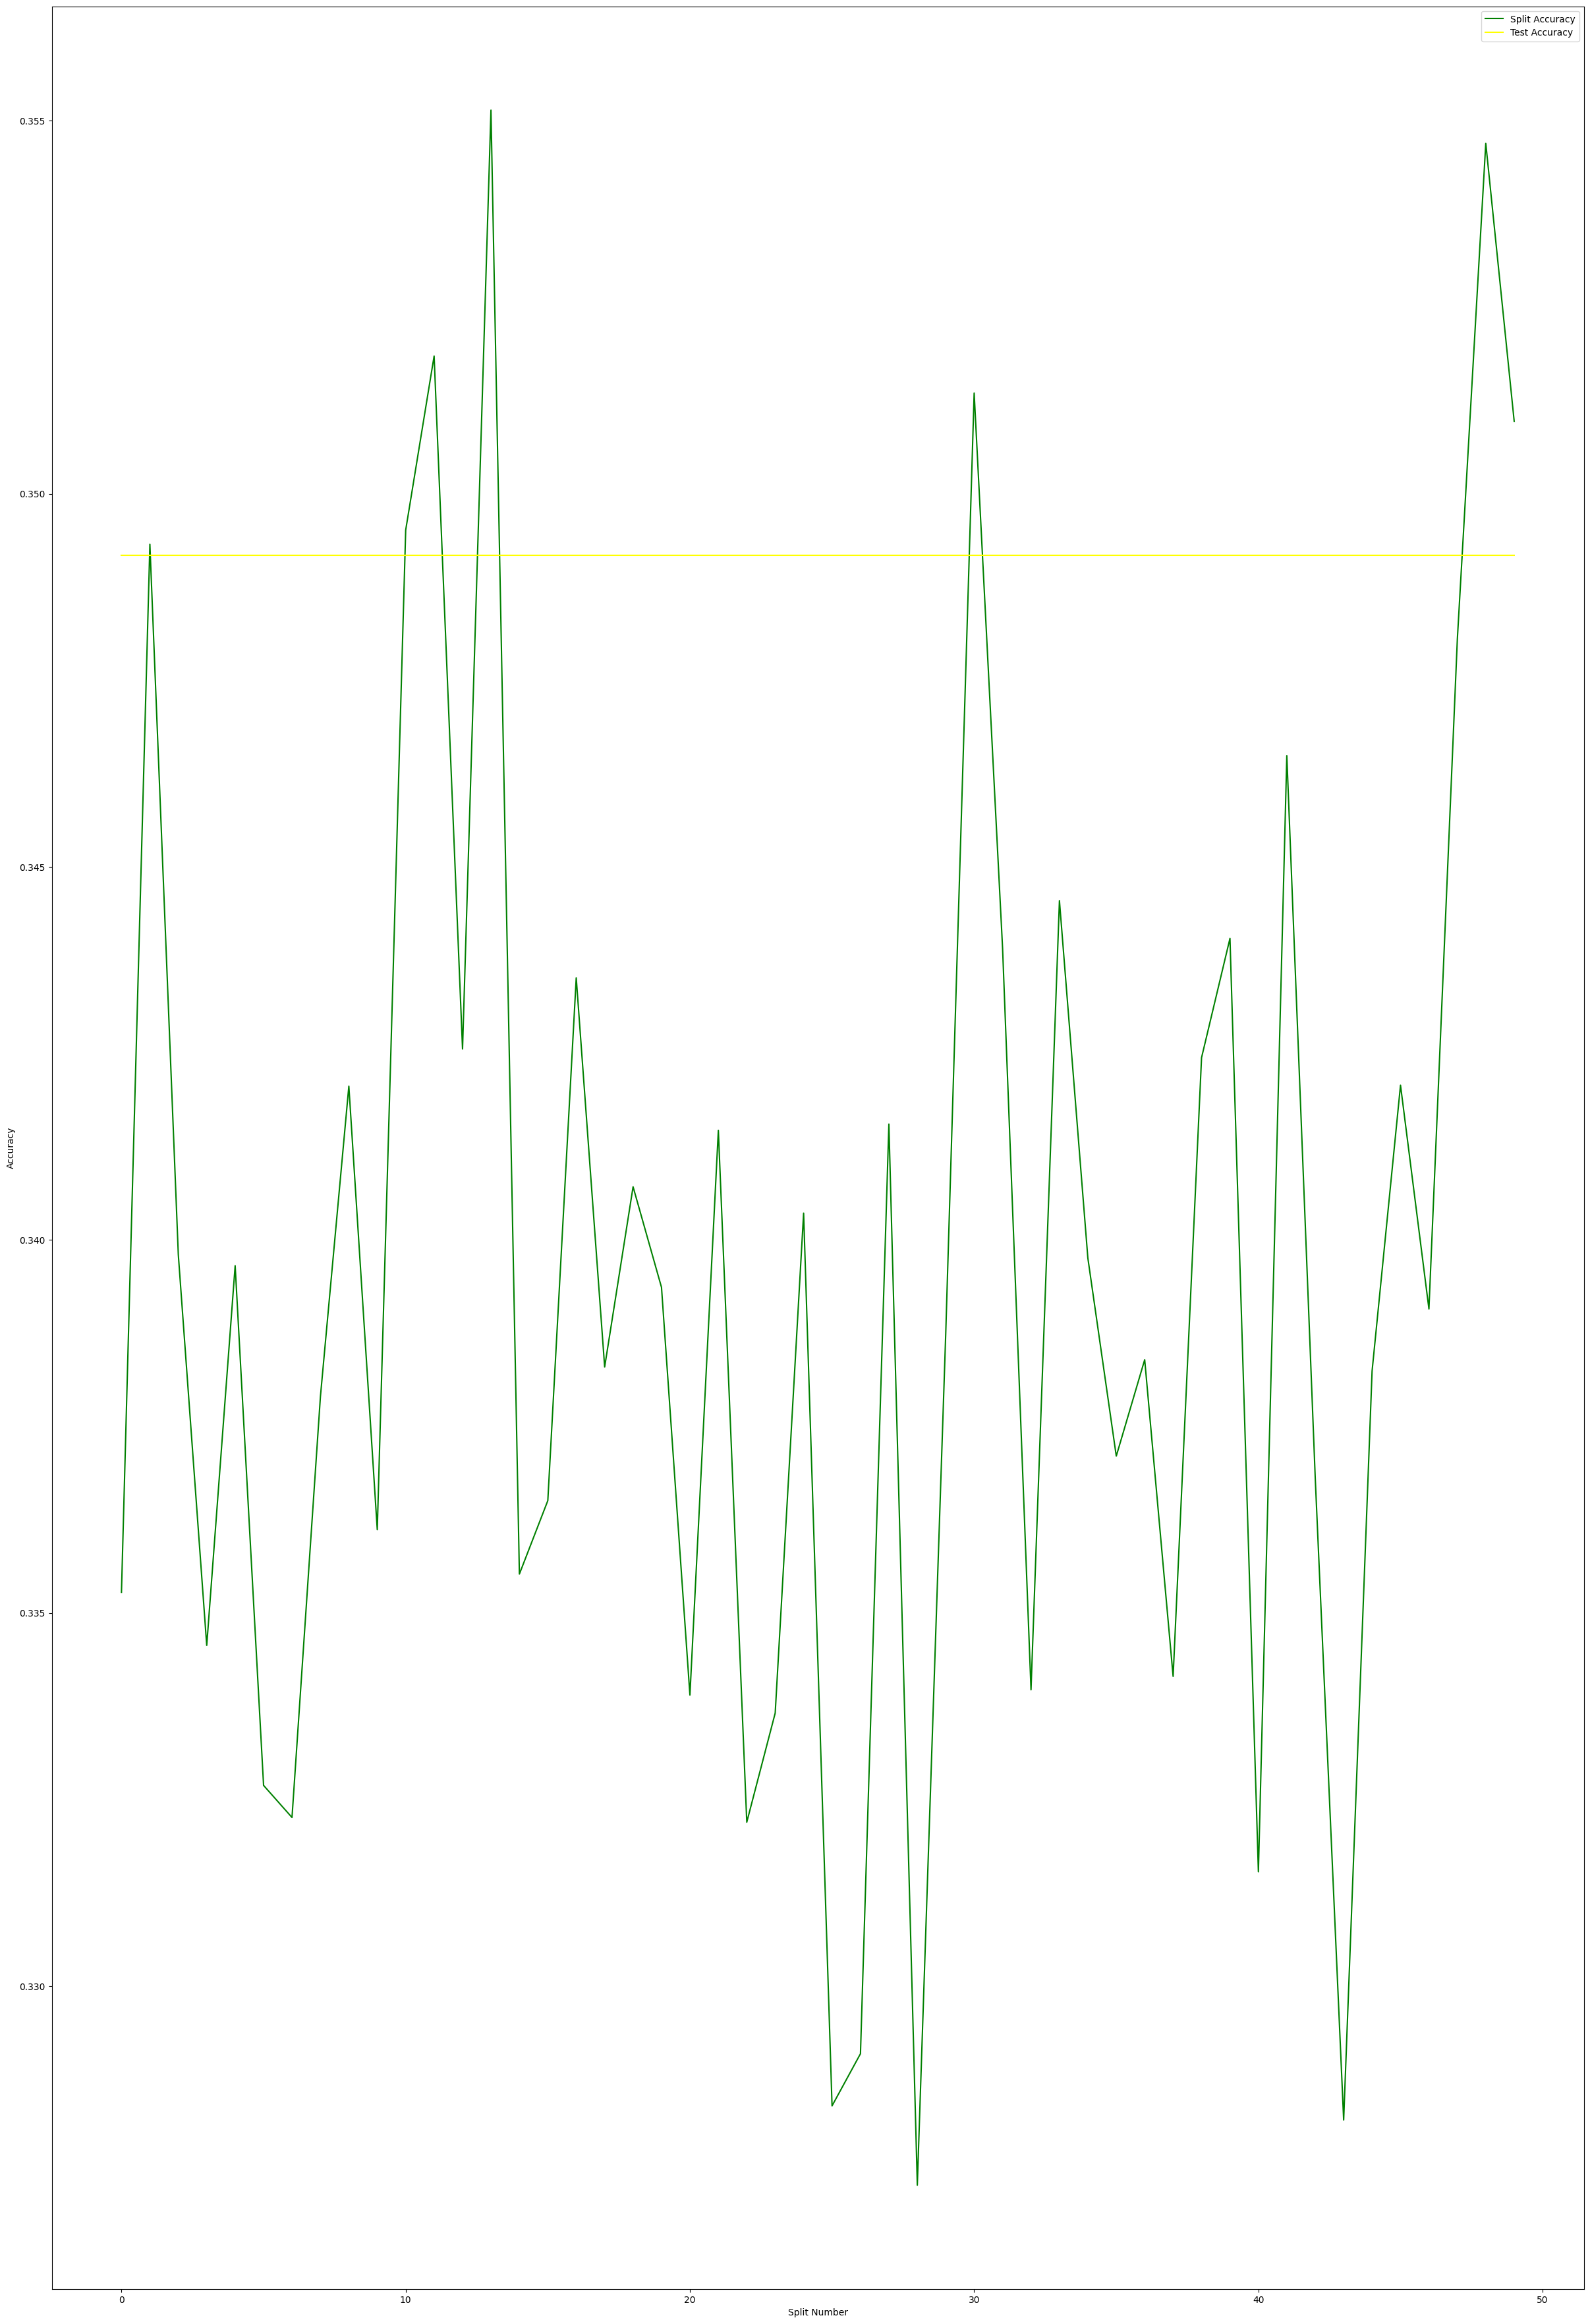

In [45]:
plt.figure(figsize = (30,45))
plt.plot(split_accuracies, label = 'Split Accuracy', color = 'green')
plt.plot(np.ones(len(split_accuracies)) * Accuracy(testlabel, testpred), label = 'Test Accuracy', color = 'yellow')
plt.xlabel('Split Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

No it doesn't give a good estimate of the test accuracy because sometimes it is less or more way than the test accuracy the average validation accuracy almost remains constant and slightly lesser than the test accuracy.

**question 3**

Increasing the number of iterations in techniques like k-fold cross-validation can help compensate for having a smaller training or validation dataset to some extent. However, there are limitations to how much you can mitigate the effects of small datasets solely by increasing iterations:

Training Dataset Size:

Increasing the number of iterations primarily helps with the stability and reliability of the performance estimate. It can provide a more representative sample of the data for training and validation. However, if your training dataset is extremely small, even with more iterations, the model may not have sufficient data to learn meaningful patterns, especially for complex models. In such cases, the model might underperform or overfit. Validation Dataset Size:

**question 4**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
# set randomseed
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print(train_X[0].shape,train_y[0])

11490434/11490434 [==============================] - 0s 0us/step
(28, 28) 5


we deal with a very small train dataset or validation dataset by increasing the iterations it won't have a significant impact